### Analysis of 2019 (second semester available in the official website of data.gouv.fr)

We import the file, then we check by 'chunk' (to not work too much the machine) the first lines in purpose to ensure validity

In [1]:
import pandas as pd

# path of the file (adjust it according to your computer)
file_path = 'C:/Users/NEZHA/OneDrive/Documents/DVF/ValeursFoncieres-2019-S2.txt'

# Columns that we conserve to our little check, we will display their first lines 
cols_to_keep = ['Date mutation', 'Valeur fonciere', 'Code postal', 'Commune', 
                'Surface Carrez du 1er lot', 'Nombre de lots', 'Type local', 'Surface reelle bati']

# 100 000 lines at a time
chunksize = 100000
chunks = pd.read_csv(file_path, delimiter='|', encoding='utf-8', chunksize=chunksize, usecols=cols_to_keep, low_memory=False)

# We display five lines to check if the importation is valid
for chunk in chunks:
    print(chunk.head())
    break  # We stop after the first chunk... that's enough

  Date mutation Valeur fonciere  Code postal               Commune  \
0    01/07/2019       244200,00       1000.0       BOURG-EN-BRESSE   
1    04/07/2019       195000,00       1250.0  HAUTECOURT-ROMANECHE   
2    04/07/2019       195000,00       1250.0  HAUTECOURT-ROMANECHE   
3    04/07/2019       110030,00       1250.0          GRAND-CORENT   
4    03/07/2019       160450,00       1270.0               COLIGNY   

  Surface Carrez du 1er lot  Nombre de lots Type local  Surface reelle bati  
0                       NaN               0     Maison                150.0  
1                       NaN               0     Maison                 94.0  
2                       NaN               0     Maison                 94.0  
3                       NaN               0     Maison                 90.0  
4                       NaN               0        NaN                  NaN  


it works perfectly ! let's keep going... Now we filter and keep the data which corresponds to the postal codes for the center of Paris metropolitan area (we consider that the center is Paris intra-muros), and we check the first lines...

In [2]:
import pandas as pd  # we re-import to be sure it works well ('cause sometimes it doesn't works)
file_path = 'C:/Users/NEZHA/OneDrive/Documents/DVF/ValeursFoncieres-2019-S2.txt'

# We load the CSV file into a Pandas DataFrame with a custom delimiter ('|'), then we specify the UTF-8 encoding to avoid character issues, and we disbale memory optimization to ensure correct loading of data types (even if its not that bad to let it)
df = pd.read_csv(file_path, delimiter='|', encoding='utf-8', low_memory=False)

# Filtering for center of Paris's agglomeration, Paris intra-muros (postal codes between 75000 and 75020)
df_paris = df[df['Code postal'].between(75000, 75020)].copy()

pd.set_option('display.max_columns', None) # we display all columns 

# little sample to check on
df_paris_sample = df_paris.head()  # five lines

# we display the sample
print(df_paris_sample)

         Identifiant de document  Reference document  1 Articles CGI  \
1802858                      NaN                 NaN             NaN   
1802876                      NaN                 NaN             NaN   
1803415                      NaN                 NaN             NaN   
1803468                      NaN                 NaN             NaN   
1803469                      NaN                 NaN             NaN   

         2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
1802858             NaN             NaN             NaN             NaN   
1802876             NaN             NaN             NaN             NaN   
1803415             NaN             NaN             NaN             NaN   
1803468             NaN             NaN             NaN             NaN   
1803469             NaN             NaN             NaN             NaN   

         No disposition Date mutation Nature mutation Valeur fonciere  \
1802858               1    19/07/2019      

Now, we extract years of the dates to create a new column, initially we wanted to treat all files in one so it could be useful, however the files must be treat differently because of the quality of our computer, it crashs every time. So it is useless to do it, but at least to show our main idea.

In [3]:
# we convert the column 'Date mutation' of the dataFrame in the format 'date'
df_paris['Date mutation'] = pd.to_datetime(df_paris['Date mutation'], errors='coerce')

# we check 
print(df_paris[['Date mutation']].head())

# Then we extract
df_paris['Année'] = df_paris['Date mutation'].dt.year

# we check/display the results
print(df_paris[['Date mutation', 'Année']].head())


C:\Users\NEZHA\AppData\Local\Temp\ipykernel_13072\979079506.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_paris['Date mutation'] = pd.to_datetime(df_paris['Date mutation'], errors='coerce')


        Date mutation
1802858    2019-07-19
1802876    2019-07-29
1803415    2019-07-26
1803468    2019-08-08
1803469    2019-08-08
        Date mutation  Année
1802858    2019-07-19   2019
1802876    2019-07-29   2019
1803415    2019-07-26   2019
1803468    2019-08-08   2019
1803469    2019-08-08   2019


In [4]:
# We create a copy of df_paris to avoid the view and work directly on the copy
df_paris_copy = df_paris.copy()

# We replace commas by points in the column 'Valeur fonciere' of the dataFrame
df_paris_copy['Valeur fonciere'] = df_paris_copy['Valeur fonciere'].replace({',': '.'}, regex=True)

# We convert 'Valeur fonciere' column to numeric, forcing errors to NaN
df_paris_copy['Valeur fonciere'] = pd.to_numeric(df_paris_copy['Valeur fonciere'], errors='coerce')

# we verify the type to check if it worked
print(df_paris_copy['Valeur fonciere'].dtype)  # it must display 'float64'

# We check the first lines
print(df_paris_copy[['Valeur fonciere']].head())



float64
         Valeur fonciere
1802858          80000.0
1802876         709850.0
1803415         295000.0
1803468         375000.0
1803469         375000.0


Little manipulation to see the some outliers

In [5]:
# Filtrer les transactions dont la valeur foncière est plus élevée que 1 million
high_value_transactions = df_paris_copy[df_paris_copy['Valeur fonciere'] > 1000000]

# Afficher les premières lignes des transactions avec des valeurs élevées
print(high_value_transactions[['Valeur fonciere']].head())


         Valeur fonciere
1806966        1136300.0
1806967        1136300.0
1929690        1460000.0
1929691        1460000.0
1929696        4055789.0


To take a good look on the outliers and their danger on the results, here is a graphic...

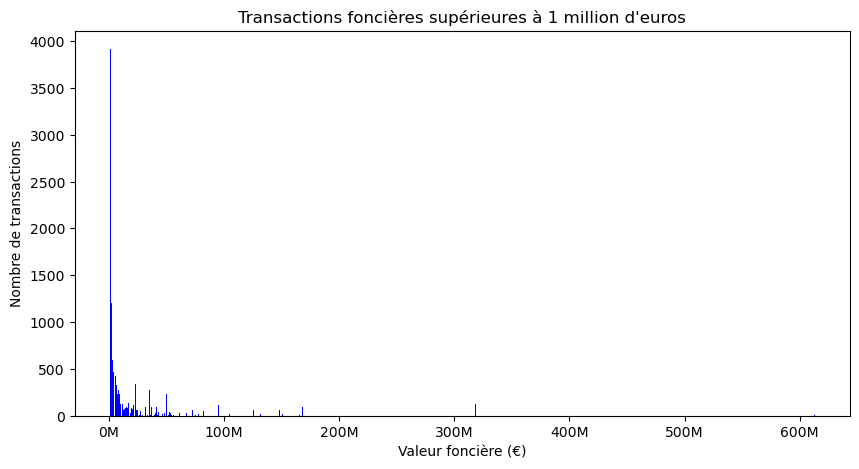

In [12]:
import matplotlib.ticker as ticker

# Création du graphique en barres avec l'axe X en millions d'euros
plt.figure(figsize=(10, 5))
plt.bar(edges[:-1], counts, width=900000, align='edge', color='blue')

# Ajouter des labels et un titre
plt.xlabel("Valeur foncière (€)")
plt.ylabel("Nombre de transactions")
plt.title("Transactions foncières supérieures à 1 million d'euros")

# Modifier l'affichage de l'axe X pour afficher les valeurs en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Afficher le graphique
plt.show()



In [22]:
# We check if the 'surface réelle bati' is present and valid
df_paris_copy['Prix_m2'] = df_paris_copy['Valeur fonciere'] / df_paris_copy['Surface reelle bati']

# We filter for values of price per m² reasonable, we don't use quantiles because otherwise ou computer bugs, but it would be the best idea... 
df_paris_filtered_m2 = df_paris_copy[df_paris_copy['Prix_m2'] < 30000]  # seuil de 30000

# After filtering, we calcul again
prix_moyen_par_annee_m2 = df_paris_filtered_m2.groupby('Année')['Prix_m2'].mean()

# We display
print(prix_moyen_par_annee_m2)

Année
2019    10224.400024
Name: Prix_m2, dtype: float64
